In [1]:
import pandas as pd
import numpy as np


np.random.seed(42)


num_records = 1000  # number of data records


signal_strengths = ['High Signal', 'Medium Signal', 'Low Signal', 'No Signal']
environments = ['Forest', 'Grassland', 'Rocky Terrain']


data = {
    'Signal Strength': np.random.choice(signal_strengths, size=num_records, p=[0.3, 0.4, 0.2, 0.1]),
    'Environment': np.random.choice(environments, size=num_records, p=[0.4, 0.3, 0.3])
}


case_study_data = pd.DataFrame(data)

case_study_data
# case_study_data.head(10)  # Displaying the first 10 records

,Signal Strength,Environment
0,Medium Signal,Forest
1,No Signal,Grassland
2,Low Signal,Rocky Terrain
3,Medium Signal,Rocky Terrain
4,High Signal,Rocky Terrain
...,...,...
995,High Signal,Grassland
996,No Signal,Rocky Terrain
997,High Signal,Forest
998,No Signal,Forest


In [2]:
from collections import defaultdict


def calculate_transition_probabilities(data):
    
    transitions = defaultdict(lambda: defaultdict(int))
    state_counts = defaultdict(int)


    for i in range(len(data) - 1):
        current_state = (data['Signal Strength'][i], data['Environment'][i])
        next_state = (data['Signal Strength'][i+1], data['Environment'][i+1])

        
        state_counts[current_state] += 1
        transitions[current_state][next_state] += 1

    
    transition_probabilities = defaultdict(dict)
    for current_state, next_states in transitions.items():
        total_transitions = state_counts[current_state]
        for next_state, count in next_states.items():
            transition_probabilities[current_state][next_state] = count / total_transitions

    return transition_probabilities


transition_probs = calculate_transition_probabilities(case_study_data)


transition_probs_df = pd.DataFrame([
    {"From": from_state, "To": to_state, "Probability": prob}
    for from_state, to_transitions in transition_probs.items()
    for to_state, prob in to_transitions.items()
])

transition_probs_df  

,From,To,Probability
0,"(Medium Signal, Forest)","(No Signal, Grassland)",0.032051
1,"(Medium Signal, Forest)","(Low Signal, Grassland)",0.057692
2,"(Medium Signal, Forest)","(Medium Signal, Grassland)",0.108974
3,"(Medium Signal, Forest)","(High Signal, Rocky Terrain)",0.096154
4,"(Medium Signal, Forest)","(High Signal, Grassland)",0.108974
...,...,...,...
134,"(Low Signal, Forest)","(Medium Signal, Grassland)",0.074627
135,"(Low Signal, Forest)","(Low Signal, Forest)",0.014925
136,"(Low Signal, Forest)","(No Signal, Grassland)",0.044776
137,"(Low Signal, Forest)","(No Signal, Forest)",0.029851


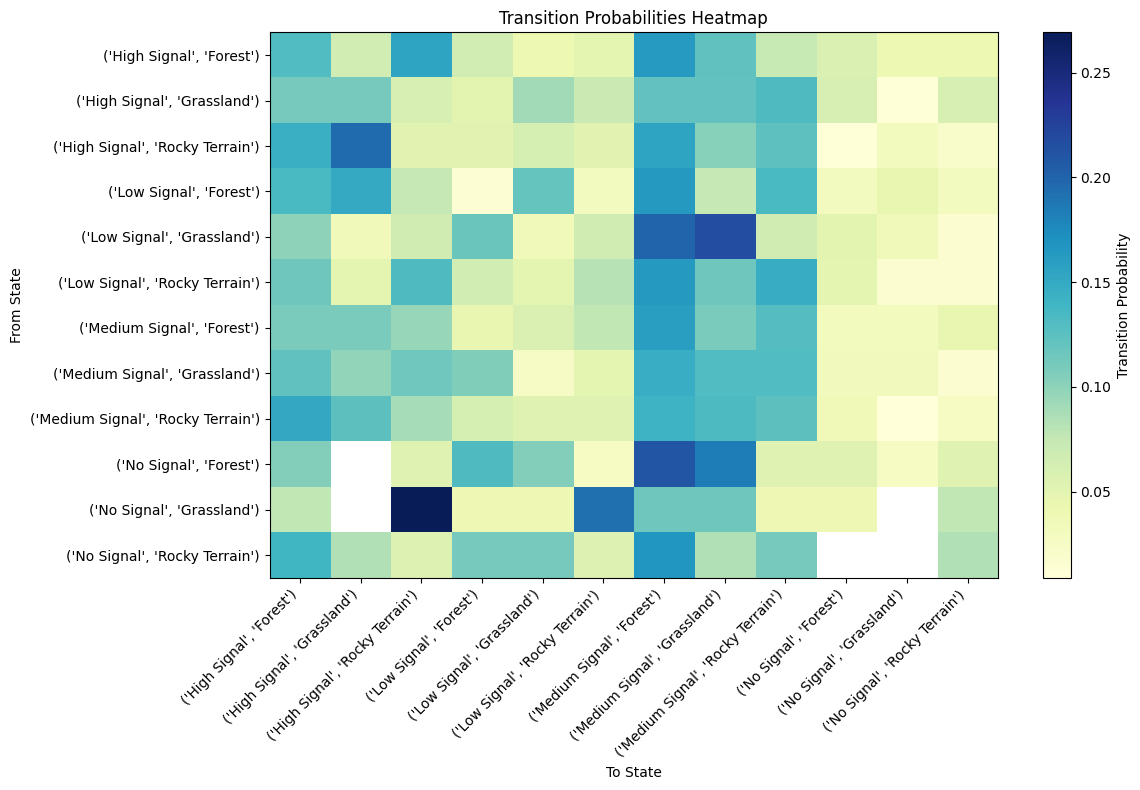

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict


transition_probs_df = pd.DataFrame([
    {"From": from_state, "To": to_state, "Probability": prob}
    for from_state, to_transitions in transition_probs.items()
    for to_state, prob in to_transitions.items()
])
heatmap_data = pd.pivot_table(transition_probs_df, values='Probability', index='From', columns='To')


plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Transition Probability')


plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45, ha="right")
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

plt.title("Transition Probabilities Heatmap")
plt.xlabel("To State")
plt.ylabel("From State")
plt.tight_layout()


plt.show()

In [4]:
import random

def simulate_markov_chain(transitions, num_steps=1000):
    
    sim_transitions = {state: list(next_states.items()) for state, next_states in transitions.items()}

    
    current_state = random.choice(list(sim_transitions.keys()))
    state_counts = defaultdict(int)
    state_counts[current_state] += 1

    
    for _ in range(num_steps - 1):
        if current_state in sim_transitions:
            next_states = sim_transitions[current_state]
            next_state = random.choices([state for state, _ in next_states], weights=[prob for _, prob in next_states])[0]
            current_state = next_state
        state_counts[current_state] += 1

    
    state_proportions = {state: count / num_steps for state, count in state_counts.items()}
    return state_proportions


num_simulation_steps = 10000  # You can adjust this number based on your needs
state_proportions = simulate_markov_chain(transition_probs, num_steps=num_simulation_steps)


state_proportions

{('Low Signal', 'Rocky Terrain'): 0.0577,
 ('High Signal', 'Rocky Terrain'): 0.0965,
 ('No Signal', 'Rocky Terrain'): 0.0372,
 ('Medium Signal', 'Forest'): 0.1511,
 ('Medium Signal', 'Rocky Terrain'): 0.1141,
 ('High Signal', 'Forest'): 0.1229,
 ('High Signal', 'Grassland'): 0.1009,
 ('Low Signal', 'Forest'): 0.0691,
 ('Medium Signal', 'Grassland'): 0.1192,
 ('Low Signal', 'Grassland'): 0.0655,
 ('No Signal', 'Forest'): 0.0405,
 ('No Signal', 'Grassland'): 0.0253}